## Pandas time series
A series or dataframe using a datetime index instead of a range index.

Used for storing events/data that fits on a time line.
- Weather data.
- Temperature data.
- Heart rate monitoring (EKG).
- Quarterly sales.
- Stock prices.

In [2]:
import numpy as np
import pandas as pd

### Creating a datetimeindex
Use date_range() with 3 of the 4 parameters:
- start
- end
- periods
- freq (frequency)

In [28]:
datetimeindex = pd.date_range(start='2018-01-01', freq="D", periods=730)
datetimeindex

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=730, freq='D')

In [29]:
df = pd.DataFrame(
    dict(
        n = range(len(datetimeindex)),
        rand = np.random.random(len(datetimeindex))
    ),
    index=datetimeindex
)

df

,n,rand
2018-01-01,0,0.110479
2018-01-02,1,0.174274
2018-01-03,2,0.128646
2018-01-04,3,0.302050
2018-01-05,4,0.812713
...,...,...
2019-12-27,725,0.866449
2019-12-28,726,0.100844
2019-12-29,727,0.218613
2019-12-30,728,0.803379


In [31]:
df.loc["2018-03-15"]
df.loc[:"2018-01-15"]
df.loc["2018-03-15":"2018-03-20"]
df.loc["2018-03"]
df.loc["2019"]
df.loc["2019-03-29":"2019-05"]

,n,rand
2019-03-29,452,0.349673
2019-03-30,453,0.352067
2019-03-31,454,0.943579
2019-04-01,455,0.588705
2019-04-02,456,0.035315
...,...,...
2019-05-27,511,0.829762
2019-05-28,512,0.385560
2019-05-29,513,0.761132
2019-05-30,514,0.892693


## Resampling
Resampling is the practice of creating new samples with a lower or higher frequency than the original data.

## Downsampling
When the sample frequency is lower than the original we can aggregate values from the original data

In [48]:
from helpers import hdisplay

resample_method = "6H"

hdisplay([
    df.head(10),
    df.resample(resample_method).max().fillna(df[["n", "rand"]].mean()).head(10)],
    ["Original", f"Resampled using '{resample_method}'"]
    )


,n,rand
2018-01-01 00:00:00,0,0.110479
2018-01-02 00:00:00,1,0.174274
2018-01-03 00:00:00,2,0.128646
2018-01-04 00:00:00,3,0.302050
2018-01-05 00:00:00,4,0.812713
2018-01-06 00:00:00,5,0.418489
2018-01-07 00:00:00,6,0.126694
2018-01-08 00:00:00,7,0.041309
2018-01-09 00:00:00,8,0.911675
2018-01-10 00:00:00,9,0.248865


# Working on real data

In [75]:
apple = pd.read_csv("../Data/HistoricalData_Apple.csv", parse_dates=["Date"], index_col="Date")
apple.rename(columns={"Close/Last": "Close"}, inplace=True)

to_int_columns = ["Close", "Open", "High", "Low"]

apple[["Close", "Open", "High", "Low"]] = apple[["Close", "Open", "High", "Low"]].map(lambda value: value.replace("$", "")).astype("float64")
apple.sort_index(inplace=True)
apple

,Close,Volume,Open,High,Low
Date,,,,,
2013-11-11,18.5374,226990197,18.5711,18.6311,18.3718
2013-11-12,18.5718,204271118,18.4882,18.7114,18.4643
2013-11-13,18.5941,196615949,18.5000,18.6518,18.4629
2013-11-14,18.8629,281606247,18.6718,18.9029,18.6382
2013-11-15,18.7497,317359713,18.8064,18.8961,18.7318
...,...,...,...,...,...
2023-11-03,176.6500,79829250,174.2400,176.8200,173.3500
2023-11-06,179.2300,63841310,176.3800,179.4300,176.2100
2023-11-07,181.8200,70529970,179.1800,182.4400,178.9700


In [82]:
apple.loc["2018", "Close"].mean()
apple.resample("Y").mean() #YS is the start of the year

,Close,Volume,Open,High,Low
Date,,,,,
2013-12-31,19.509140,3.059521e+08,19.499974,19.651411,19.375683
2014-12-31,23.066148,2.516821e+08,23.054946,23.253159,22.871088
2015-12-31,30.009965,2.065851e+08,30.042381,30.310365,29.715737
2016-12-31,26.151002,1.530707e+08,26.126925,26.356766,25.922553
2017-12-31,37.637764,1.080108e+08,37.612713,37.851502,37.371890
2018-12-31,47.263357,1.350735e+08,47.276384,47.748514,46.795855
2019-12-31,52.063983,1.122429e+08,51.967270,52.457905,51.568252
2020-12-31,95.346759,1.576214e+08,95.267638,96.661719,93.912504
2021-12-31,140.989325,9.054053e+07,140.861488,142.347679,139.473963


In [83]:
import seaborn as sns

<Axes: xlabel='Date', ylabel='Open'>

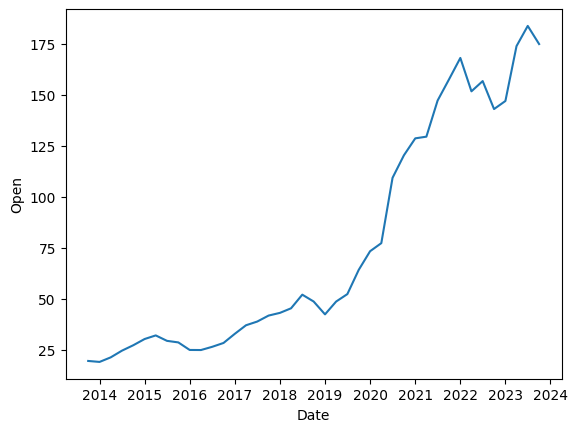

In [87]:
data = apple.loc["2020-10"]
data = apple.loc["2020"].resample('M').mean()
data = apple.resample("QS").mean()
sns.lineplot(data=data, x=data.index, y="Open")